<a href="https://colab.research.google.com/github/superpanditas/Quinio/blob/main/Copia_de_Weekly_SKU_level_Product_Sales_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the data
data = pd.read_csv('/content/Productlevel_Sales_Transactions_Dataset_Weekly.csv')
# Print data
data.head()

,Scode,Pcode,Price,Wk0,Wk1,Wk2,Wk3,Wk4,Wk5,Wk6,...,Wk96,Wk97,Wk98,Wk99,Wk100,Wk101,Wk102,Wk103,Unnamed: 107,94
0,Store1,SKU1,$24.00,23,48,47,42,22,29,47,...,33,40,125,133,229,381,21,31,NaN,NaN
1,Store1,SKU2,$63.00,23,22,25,40,32,26,30,...,25,50,75,95,231,590,25,33,NaN,NaN
2,Store1,SKU3,$93.00,7,11,8,9,10,8,7,...,13,30,67,188,267,330,35,33,NaN,NaN
3,Store1,SKU4,$48.00,50,31,50,33,26,27,42,...,26,23,92,126,205,357,30,34,NaN,NaN
4,Store1,SKU5,$62.00,8,5,13,11,6,7,9,...,15,21,93,243,710,1872,33,10,NaN,NaN


In [7]:
# info about DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 109 entries, Scode to 94
dtypes: float64(2), int64(104), object(3)
memory usage: 5.0+ MB


In [8]:
print('Number of Stores:', data['Scode'].nunique())

Number of Stores: 5


In [9]:
# Frequenthly of products
count_products = data['Pcode'].value_counts()
count_products = count_products.to_frame()
count_products = count_products.reset_index()
#print(count_products.sort_values(by='Pcode', ascending=False))

# The number of products that are repeated x times
freq_products = count_products.groupby('Pcode')['index'].count()
print(freq_products)

Pcode
1     506
2     324
3     309
4     252
5     192
6     107
7      78
8      48
9      19
10     14
11      4
12      2
Name: index, dtype: int64


In [10]:
# dtypes of all columns
#print(data.dtypes)

# Function to remove non-numeric values and convert string to float
def convert_value(string_value):
  if isinstance(string_value, (int, float)):
    return string_value
  string_value = ''.join(s for s in string_value if s.isdigit() or s in ['.', ','])
  return float(string_value)

data['Price'] = data['Price'].apply(lambda x: convert_value(x))

In [11]:
# Eliminate columns "Unnamed: 107" and "94" because have null values in all rows
data = data.drop(['Unnamed: 107', '94'], axis=1)

# Change week columns by dates to manage more easily data
# Init dates by Mondays
start_date = '2022-01-03'

dates = pd.date_range(start=start_date, periods=104, freq='7D')
data.rename(columns=dict(zip(data.loc[:, ~data.columns.isin(['Scode', 'Pcode', 'Price'])].columns, dates)), inplace=True)

data.head()

,Scode,Pcode,Price,2022-01-03 00:00:00,2022-01-10 00:00:00,2022-01-17 00:00:00,2022-01-24 00:00:00,2022-01-31 00:00:00,2022-02-07 00:00:00,2022-02-14 00:00:00,...,2023-10-23 00:00:00,2023-10-30 00:00:00,2023-11-06 00:00:00,2023-11-13 00:00:00,2023-11-20 00:00:00,2023-11-27 00:00:00,2023-12-04 00:00:00,2023-12-11 00:00:00,2023-12-18 00:00:00,2023-12-25 00:00:00
0,Store1,SKU1,24.0,23,48,47,42,22,29,47,...,31,37,33,40,125,133,229,381,21,31
1,Store1,SKU2,63.0,23,22,25,40,32,26,30,...,20,20,25,50,75,95,231,590,25,33
2,Store1,SKU3,93.0,7,11,8,9,10,8,7,...,9,17,13,30,67,188,267,330,35,33
3,Store1,SKU4,48.0,50,31,50,33,26,27,42,...,31,23,26,23,92,126,205,357,30,34
4,Store1,SKU5,62.0,8,5,13,11,6,7,9,...,19,9,15,21,93,243,710,1872,33,10


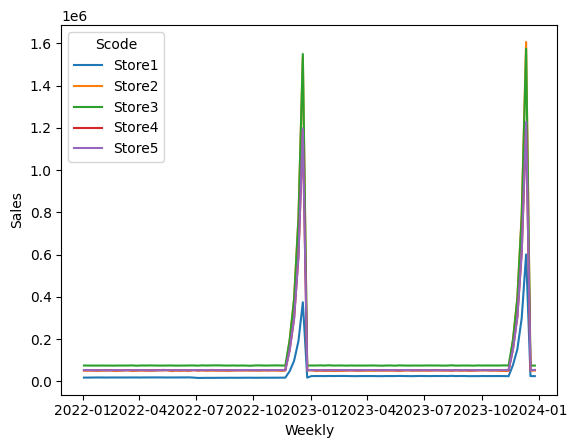

In [12]:
data_stores = data.copy()

data_stores = data_stores.drop(['Pcode', 'Price'], axis=1)
data_stores_sum = data_stores.groupby('Scode').agg('sum')
data_stores_sum = data_stores_sum.reset_index()

# Convert columns to variables 
data_stores_melted = pd.melt(data_stores_sum, id_vars='Scode', var_name='Weekly', value_name='Sales')
#print(data_stores_melted)

# Visualize data
sns.lineplot(x='Weekly', y='Sales', hue='Scode', data=data_stores_melted)
plt.show()

### Analyzing data from Store 1

In [ ]:
# Store1
store1 = data.loc[data['Scode'] == 'Store1']
store1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Columns: 107 entries, Scode to 2023-12-25 00:00:00
dtypes: float64(1), int64(104), object(2)
memory usage: 843.8+ KB


In [ ]:
store1['Price'].describe()

count    1000.000000
mean       55.919000
std        27.140985
min        10.000000
25%        32.000000
50%        56.000000
75%        80.000000
max       100.000000
Name: Price, dtype: float64

##### Understanding the distribution of variable called price
##### It looks like good distribution with same quantity of products for each bins of size 10, slightly more in products with more highers prices 

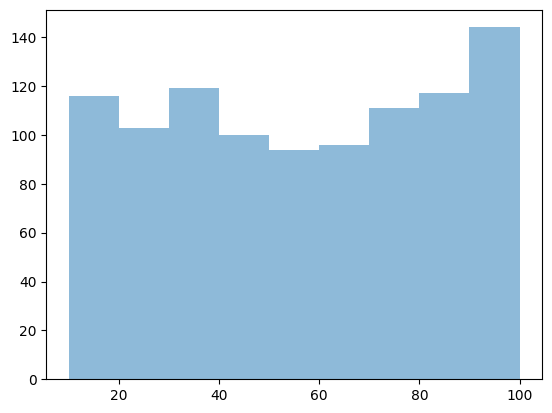

In [ ]:
s1_price = store1['Price']
s1_price = s1_price.to_frame()
s1_price_sorted = s1_price.sort_values('Price')

plt.hist(s1_price_sorted, bins=np.arange(10,110,10), alpha=0.5)
plt.show()

In [ ]:
store1_flt = store1.loc[:, ~data.columns.isin(['Scode', 'Price'])]
store1_flt.head()

,Pcode,2022-01-03 00:00:00,2022-01-10 00:00:00,2022-01-17 00:00:00,2022-01-24 00:00:00,2022-01-31 00:00:00,2022-02-07 00:00:00,2022-02-14 00:00:00,2022-02-21 00:00:00,2022-02-28 00:00:00,...,2023-10-23 00:00:00,2023-10-30 00:00:00,2023-11-06 00:00:00,2023-11-13 00:00:00,2023-11-20 00:00:00,2023-11-27 00:00:00,2023-12-04 00:00:00,2023-12-11 00:00:00,2023-12-18 00:00:00,2023-12-25 00:00:00
0,SKU1,23,48,47,42,22,29,47,23,26,...,31,37,33,40,125,133,229,381,21,31
1,SKU2,23,22,25,40,32,26,30,50,29,...,20,20,25,50,75,95,231,590,25,33
2,SKU3,7,11,8,9,10,8,7,13,12,...,9,17,13,30,67,188,267,330,35,33
3,SKU4,50,31,50,33,26,27,42,43,24,...,31,23,26,23,92,126,205,357,30,34
4,SKU5,8,5,13,11,6,7,9,14,9,...,19,9,15,21,93,243,710,1872,33,10


In [ ]:
store1_melted = pd.melt(store1_flt, id_vars=["Pcode"], var_name="dates", value_name="venta")
# df_melted.head(15)
store1_pivoted = store1_melted.pivot(index="dates", columns="Pcode", values="venta")
store1_pivoted.head()

Pcode,SKU1,SKU10,SKU100,SKU1000,SKU1001,SKU1002,SKU1003,SKU1004,SKU1005,SKU1006,...,SKU990,SKU991,SKU992,SKU993,SKU994,SKU995,SKU996,SKU997,SKU998,SKU999
dates,,,,,,,,,,,,,,,,,,,,,
2022-01-03,23,22,13,53,60,58,52,53,57,60,...,56,56,55,58,52,57,55,58,57,53
2022-01-10,48,19,6,57,52,50,52,60,58,54,...,53,52,59,58,53,56,59,53,54,53
2022-01-17,47,19,7,54,55,53,54,58,55,51,...,50,56,60,52,54,51,51,50,50,56
2022-01-24,42,29,9,52,55,50,57,58,57,56,...,58,55,57,56,53,60,50,50,50,60
2022-01-31,22,20,9,53,51,52,59,57,50,59,...,53,60,60,60,55,58,50,57,54,57


In [ ]:
s1_data = store1_pivoted.reset_index()
s1_data.head()

Pcode,dates,SKU1,SKU10,SKU100,SKU1000,SKU1001,SKU1002,SKU1003,SKU1004,SKU1005,...,SKU990,SKU991,SKU992,SKU993,SKU994,SKU995,SKU996,SKU997,SKU998,SKU999
0,2022-01-03,23,22,13,53,60,58,52,53,57,...,56,56,55,58,52,57,55,58,57,53
1,2022-01-10,48,19,6,57,52,50,52,60,58,...,53,52,59,58,53,56,59,53,54,53
2,2022-01-17,47,19,7,54,55,53,54,58,55,...,50,56,60,52,54,51,51,50,50,56
3,2022-01-24,42,29,9,52,55,50,57,58,57,...,58,55,57,56,53,60,50,50,50,60
4,2022-01-31,22,20,9,53,51,52,59,57,50,...,53,60,60,60,55,58,50,57,54,57


##### Note that a lot of product have high std and the difference between 75% perc. and max are big than min and 25% perc.

In [ ]:
store1_pivoted.describe().round(0)

Pcode,SKU1,SKU10,SKU100,SKU1000,SKU1001,SKU1002,SKU1003,SKU1004,SKU1005,SKU1006,...,SKU990,SKU991,SKU992,SKU993,SKU994,SKU995,SKU996,SKU997,SKU998,SKU999
count,104.0,104.0,104.0,104.0,104.0,104.0,104.0,104.0,104.0,104.0,...,104.0,104.0,104.0,104.0,104.0,104.0,104.0,104.0,104.0,104.0
mean,46.0,32.0,32.0,98.0,83.0,78.0,90.0,65.0,82.0,83.0,...,71.0,90.0,97.0,71.0,69.0,92.0,90.0,79.0,78.0,103.0
std,55.0,63.0,75.0,192.0,123.0,110.0,166.0,43.0,122.0,132.0,...,80.0,155.0,221.0,80.0,68.0,246.0,158.0,117.0,124.0,212.0
min,20.0,1.0,1.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
25%,26.0,15.0,8.0,53.0,53.0,52.0,53.0,53.0,53.0,52.0,...,52.0,52.0,53.0,53.0,53.0,52.0,51.0,52.0,52.0,53.0
50%,33.0,20.0,12.0,56.0,56.0,55.0,57.0,56.0,55.0,55.0,...,56.0,56.0,55.0,56.0,55.0,55.0,55.0,54.0,55.0,56.0
75%,44.0,25.0,27.0,59.0,59.0,58.0,59.0,59.0,58.0,58.0,...,58.0,59.0,59.0,58.0,57.0,58.0,59.0,58.0,58.0,59.0
max,381.0,503.0,567.0,1364.0,866.0,888.0,1502.0,356.0,870.0,1138.0,...,646.0,1003.0,1933.0,663.0,528.0,2404.0,1288.0,1034.0,1203.0,1517.0


##### Add a column with the sum of all values for each week and display to visualize the data and observe the outliers, trends and patterns in general but is not possible to visualize good the data because have high dispersion between some points.

In [ ]:
s1_data['Total'] = s1_data.sum(axis=1)

<ipython-input-39-381a8b903c8b>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  s1_data['Total'] = s1_data.sum(axis=1)


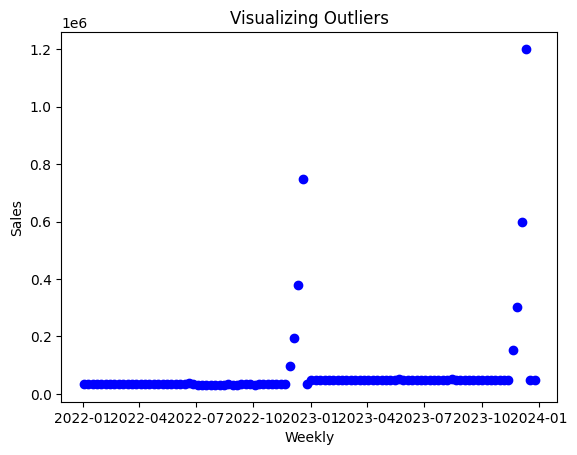

In [ ]:
fig, ax = plt.subplots()
ax.set_yscale('linear')
ax.scatter(s1_data['dates'], s1_data['Total'], color='blue')
ax.set_xlabel('Weekly')
ax.set_ylabel('Sales')
ax.set_title('Visualizing Outliers')
plt.show()

In [ ]:
s1_data_sorted = s1_data.sort_values('Total', ascending=False)
s1_data_sorted.head(10).round(2)

Pcode,dates,SKU1,SKU10,SKU100,SKU1000,SKU1001,SKU1002,SKU1003,SKU1004,SKU1005,...,SKU991,SKU992,SKU993,SKU994,SKU995,SKU996,SKU997,SKU998,SKU999,Total
101,2023-12-11,381,503,567,1364,797,888,1502,187,870,...,1003,806,528,528,184,1288,1034,275,1137,1200836
50,2022-12-19,358,282,423,1223,866,698,572,356,594,...,918,1933,663,467,2404,815,517,1203,1517,747798
100,2023-12-04,229,226,237,688,282,351,549,134,633,...,424,344,177,200,135,551,449,197,877,598792
49,2022-12-12,179,258,240,536,539,240,538,283,558,...,863,1024,313,308,905,508,340,424,897,380436
99,2023-11-27,133,107,162,335,169,262,294,103,218,...,213,173,164,123,103,289,248,171,388,302244
48,2022-12-05,136,97,80,480,377,155,317,212,222,...,409,356,110,138,364,350,173,349,307,193468
98,2023-11-20,125,41,56,113,74,162,120,71,93,...,81,70,69,65,64,105,126,82,140,153732
47,2022-11-28,58,41,77,168,177,81,124,117,75,...,154,119,63,118,143,156,84,138,110,95528
84,2023-08-14,22,26,28,59,55,58,51,58,54,...,60,59,53,57,50,60,59,50,57,50866
72,2023-05-22,44,13,30,56,55,56,59,55,54,...,51,51,56,54,59,57,52,55,60,50270


##### Trying to replace all point higher than 1.5 * std with the mean then now is possible to visualize the data better

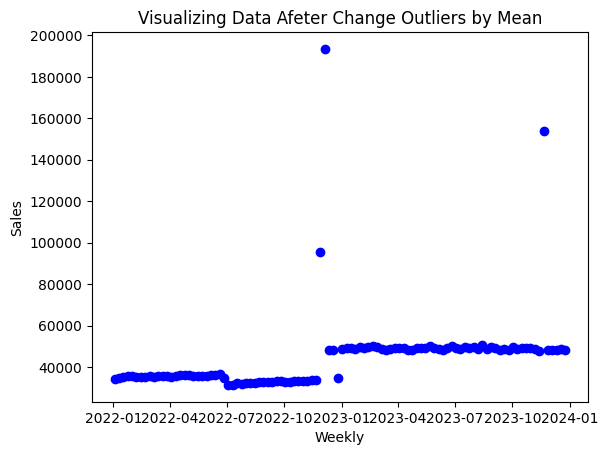

In [ ]:
temp_s1_data = s1_data.copy() 
temp_s1_data['Total'] = temp_s1_data['Total'].mask((temp_s1_data['Total'] - temp_s1_data['Total'].mean()).abs() > 1.5 * temp_s1_data['Total'].std(), temp_s1_data['Total'].median())

fig, ax = plt.subplots()

ax.scatter(temp_s1_data['dates'], temp_s1_data['Total'], color='blue')
ax.set_xlabel('Weekly')
ax.set_ylabel('Sales')
ax.set_title('Visualizing Data Afeter Change Outliers by Mean')
plt.show()

##### The objective in this part is understand in detail the time series and get some insights. Use the clasic descomposition in 3 phases that are trend, seasonality and residuals. 

Observe that exist a trend up in the general data althought in some periods exists trends down. In the months of November and December are the better months of year and note that after this months the trend does not have changes abruts.And the resudual is flat then all info is capture between trend and seasonalities.

dates
2022-01-03    17159.000000
2022-01-10    17322.000000
2022-01-17    17547.000000
2022-01-24    17836.000000
2022-01-31    17781.000000
                  ...     
2023-11-27    36910.855769
2023-12-04    36910.855769
2023-12-11    36910.855769
2023-12-18    24390.000000
2023-12-25    24137.000000
Name: Total, Length: 104, dtype: float64


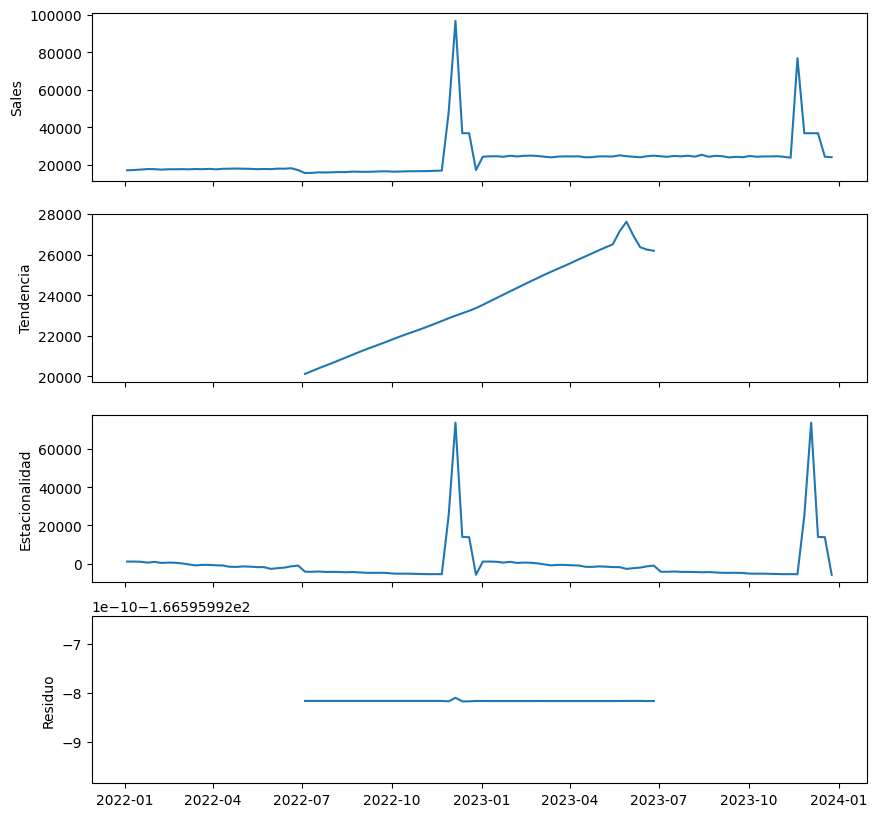

In [ ]:
# Review of seasonality, cyclicality and trend of the general data of store 1 through a decomposition of the time series ... 

df_ts_s1 = temp_s1_data.copy()
df_ts_s1['dates'] = pd.to_datetime(df_ts_s1['dates'])
df_ts_s1.set_index('dates', inplace=True)

ts_s1 = df_ts_s1['Total']

print(ts_s1)

# Clasic Descomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(ts_s1, model='additive')

fig, ax = plt.subplots(nrows=4, figsize=(10,10), sharex=True)
ax[0].plot(ts_s1)
ax[0].set_ylabel('Sales')
ax[1].plot(decomp.trend)
ax[1].set_ylabel('Tendencia')
ax[2].plot(decomp.seasonal)
ax[2].set_ylabel('Estacionalidad')
ax[3].plot(decomp.resid)
ax[3].set_ylabel('Residuo')
plt.show()

In [ ]:
'''
decomp_mul = seasonal_decompose(ts_s1, model='multiplicative')

fig, ax = plt.subplots(nrows=4, figsize=(10,10), sharex=True)
ax[0].plot(ts_s1)
ax[0].set_ylabel('Sales')
ax[1].plot(decomp_mul.trend)
ax[1].set_ylabel('Tendencia')
ax[2].plot(decomp_mul.seasonal)
ax[2].set_ylabel('Estacionalidad')
ax[3].plot(decomp_mul.resid)
ax[3].set_ylabel('Residuo')
plt.show()
'''

"\ndecomp_mul = seasonal_decompose(ts_s1, model='multiplicative')\n\nfig, ax = plt.subplots(nrows=4, figsize=(10,10), sharex=True)\nax[0].plot(ts_s1)\nax[0].set_ylabel('Sales')\nax[1].plot(decomp_mul.trend)\nax[1].set_ylabel('Tendencia')\nax[2].plot(decomp_mul.seasonal)\nax[2].set_ylabel('Estacionalidad')\nax[3].plot(decomp_mul.resid)\nax[3].set_ylabel('Residuo')\nplt.show()\n"

##### Now is time to calculate the best sales weekly across all prodocts but before use some techniques to not let be influence by outliers. 

Use Trimmed Mean that consist on calculate mean but after removing the x% of both tails to remove outliers.



In [ ]:
from scipy.stats import trim_mean
import numpy as np
import statsmodels.api as sm

# Searching the SKU with the best sales weekly but taking in cosideration outliers and for this process consider trimmed mean, mean and std by sku

# trimmed mean
trimmed_mean_1 = store1_pivoted.apply(lambda x: trim_mean(x, proportiontocut=0.20))
trimmed_mean_1 = trimmed_mean_1.reset_index(name='tm_w')
trimmed_mean_sorted_1 = trimmed_mean_1.sort_values('tm_w', ascending=False)
##trimmed_mean_sorted_1.head(20)

# mean
mean_1 = store1_pivoted.apply(lambda x: np.mean(x))
mean_1 = mean_1.reset_index(name='mean_w')
mean_sorted_1 = mean_1.sort_values('mean_w', ascending=False)
##mean_sorted_1.head(10)

# std 
std_1 = store1_pivoted.apply(lambda x: np.std(x))
std_1 = std_1.reset_index(name='std_w')
std_sorted_1 = std_1.sort_values('std_w', ascending=True)
##std_sorted_1.head(20)

##### In this DataFrame visualize for each product trimmed mean, mean and std. And sorting by trimmed mean to get the product with the best weekly sales. 

In [ ]:
# Join DataFrames
store1_central_value = trimmed_mean_1.merge(mean_1, on='Pcode').merge(std_1, on='Pcode')
store1_central_value['rank_std'] = store1_central_value['std_w'].rank(method='dense', ascending=False)
store1_central_value.sort_values('tm_w', ascending=False).head(10)

,Pcode,tm_w,mean_w,std_w,rank_std
974,SKU976,56.750000,84.663462,127.636474,182.0
910,SKU918,56.406250,86.125000,151.402081,102.0
946,SKU950,56.375000,108.586538,298.640304,4.0
896,SKU905,56.328125,78.134615,97.699210,323.0
10,SKU1007,56.234375,104.798077,239.146896,18.0
932,SKU938,56.187500,75.096154,87.193917,368.0
836,SKU851,56.171875,81.375000,109.077089,263.0
6,SKU1003,56.171875,89.865385,165.478912,74.0
914,SKU921,56.171875,80.913462,108.685601,265.0
959,SKU962,56.156250,80.230769,110.498193,252.0


##### Visualizing the top 3 products and after see the plot and confirm that SKU976 have the best weekly sales average

<ipython-input-22-0f5c50c3479e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outliers.index] = mean
<ipython-input-22-0f5c50c3479e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outliers.index] = mean
<ipython-input-22-0f5c50c3479e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outliers.index] = mean


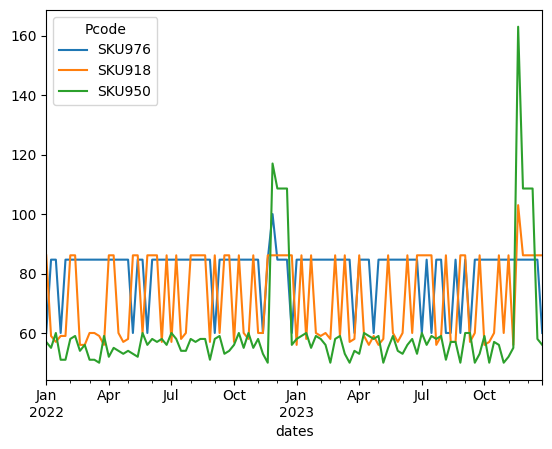

In [ ]:
columns = ['SKU976', 'SKU918', 'SKU950']

def replace_outliers_with_mean(column):
    std = column.std()
    mean = column.mean()
    outliers = column[(column < mean - 0.2 * std) | (column > mean + 0.2 * std)]
    column[outliers.index] = mean
    return column

temp_data = s1_data.copy()

for col in columns:
  temp_data[col] = replace_outliers_with_mean(temp_data[col])

temp_data.plot(x='dates', y=columns) 
plt.show()

##### Forecast next 3 months of sales

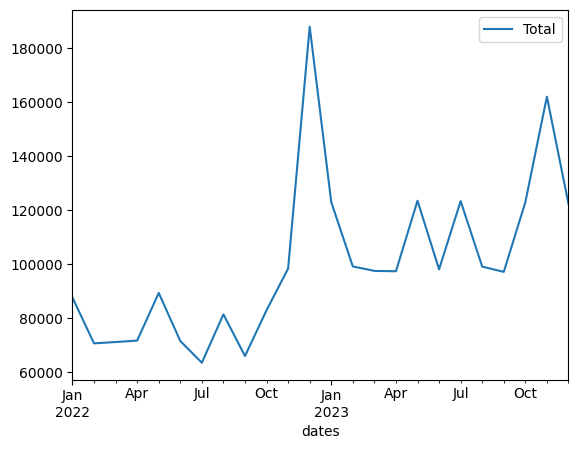

In [ ]:
# Change weekly dates to monthly dates for simplicity to manage data
ts = temp_s1_data.copy()
ts = ts[['dates', 'Total']]

ts['dates'] = pd.to_datetime(ts['dates'])
ts.set_index('dates', inplace=True)

ts_monthly = ts.resample('M').sum()
ts_monthly = ts_monthly.reset_index()

ts_monthly.plot(x='dates', y='Total')
plt.show()

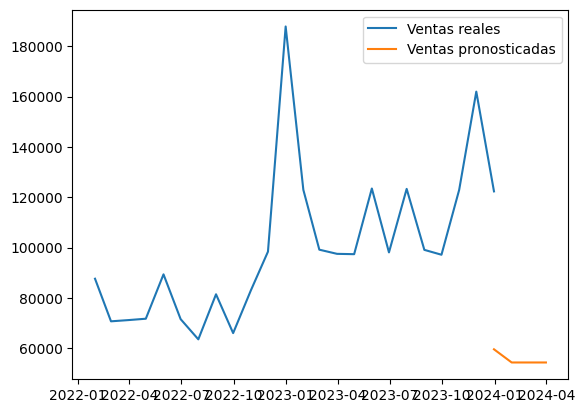

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

st_xgb = ts_monthly.copy()

st_xgb['month'] = pd.to_datetime(st_xgb['dates']).dt.month

train, test = train_test_split(st_xgb, test_size=0.45, shuffle=True)

train_X = train[["month"]]
train_y = train["Total"]
test_X = test[["month"]]
test_y = test["Total"]

# crear matriz de entrenamiento y validación
dtrain = xgb.DMatrix(train_X, label=train_y)
dtest = xgb.DMatrix(test_X, label=test_y)

# configurar hiperparámetros del modelo
params = {
    "max_depth": 3,
    "eta": 0.1,
    "subsample": 0.7,
    "objective": "reg:squarederror",
    "eval_metric": "rmse"
}

# entrenar modelo
model = xgb.train(params, dtrain)

# crear fechas futuras para predecir
future_dates = pd.date_range(start=st_xgb["dates"].iloc[-1], periods=4, freq="M")
future_month = pd.Series(future_dates).dt.month

# crear matriz para predecir
future_X = xgb.DMatrix(pd.DataFrame({"month": future_month}))

# hacer predicciones
predictions = model.predict(future_X)

# crear dataframe de predicciones
forecast = pd.DataFrame({"dates": future_dates, "Total": predictions})

# concatenar predicciones con datos originales
data = pd.concat([st_xgb, forecast], ignore_index=True)

# graficar predicciones
import matplotlib.pyplot as plt

plt.plot(st_xgb["dates"], st_xgb["Total"], label="Ventas reales")
plt.plot(forecast["dates"], forecast["Total"], label="Ventas pronosticadas")
plt.legend()
plt.show()

In [ ]:
x_test = xgb.DMatrix(test_X)
predict = model.predict(x_test)
print(test_X)

Pcode  month
13         2
14         3
15         4
16         5
17         6
18         7
19         8
20         9
21        10
22        11
23        12


In [ ]:
print(st_xgb.head(24))
print(forecast.head())

Pcode      dates          Total  month
0     2022-01-31   87645.000000      1
1     2022-02-28   70717.000000      2
2     2022-03-31   71215.000000      3
3     2022-04-30   71751.000000      4
4     2022-05-31   89384.000000      5
5     2022-06-30   71585.000000      6
6     2022-07-31   63556.000000      7
7     2022-08-31   81461.000000      8
8     2022-09-30   66032.000000      9
9     2022-10-31   82984.000000     10
10    2022-11-30   98401.000000     11
11    2022-12-31  187878.711538     12
12    2023-01-31  122972.000000      1
13    2023-02-28   99186.000000      2
14    2023-03-31   97532.000000      3
15    2023-04-30   97397.000000      4
16    2023-05-31  123492.000000      5
17    2023-06-30   98107.000000      6
18    2023-07-31  123344.000000      7
19    2023-08-31   99113.000000      8
20    2023-09-30   97174.000000      9
21    2023-10-31  122953.000000     10
22    2023-11-30  162001.855769     11
23    2023-12-31  122348.711538     12
       dates         Tota

### Optimización de Precio

In [ ]:
SKU321 = data[data['Pcode'] == 'SKU321'] 
SKU321.head(15)

,Scode,Pcode,Price,2022-01-03 00:00:00,2022-01-10 00:00:00,2022-01-17 00:00:00,2022-01-24 00:00:00,2022-01-31 00:00:00,2022-02-07 00:00:00,2022-02-14 00:00:00,...,2023-10-23 00:00:00,2023-10-30 00:00:00,2023-11-06 00:00:00,2023-11-13 00:00:00,2023-11-20 00:00:00,2023-11-27 00:00:00,2023-12-04 00:00:00,2023-12-11 00:00:00,2023-12-18 00:00:00,2023-12-25 00:00:00
320,Store1,SKU321,91.0,3,6,8,5,3,3,3,...,31,25,5,9,54,73,95,201,35,1
1320,Store2,SKU321,64.0,16,9,91,93,1,80,17,...,66,83,68,12,155,343,492,1216,29,24
2012,Store3,SKU321,41.0,97,78,88,56,87,57,66,...,73,73,100,56,228,402,880,1260,51,91
2093,Store3,SKU321,94.0,81,76,93,53,57,67,91,...,75,69,79,62,271,677,1752,1801,64,86
2212,Store3,SKU321,67.0,78,61,79,55,80,98,73,...,65,79,86,61,286,495,1391,1882,73,54
2280,Store3,SKU321,87.0,65,67,93,53,84,79,90,...,87,74,99,60,207,459,507,980,65,67
2562,Store3,SKU321,10.0,64,65,64,72,68,75,76,...,88,96,76,92,100,228,533,1480,70,61
2595,Store3,SKU321,30.0,56,54,50,54,62,76,73,...,65,79,85,80,198,520,1495,2770,58,86
2834,Store3,SKU321,43.0,87,60,60,92,54,68,78,...,65,64,73,53,253,265,793,1284,62,59
2883,Store3,SKU321,87.0,51,99,59,66,95,66,58,...,100,79,51,64,147,395,683,1717,63,57


In [ ]:
SKU321_flt = SKU321.loc[:, ~SKU321.columns.isin(['Scode', 'Pcode'])]

'''
# Calculating mean sales weekly by each price
SKU321_melted = SKU321_flt.melt(id_vars=['Price'], var_name='Weekly', value_name='Sales')

SKU321_mean = SKU321_melted.groupby('Price')['Sales'].mean().reset_index()
print(SKU321_mean)

# Calculating mean sales weekly by each price but using percentiles to avoid outliers
p10, p90 = SKU321_melted['Sales'].quantile([0.10, 0.90])
SKU321_melted['Sales_Acot'] = SKU321_melted['Sales'].clip(p10,p90)
SKU321_mean_clip = SKU321_melted.groupby('Price')['Sales_Acot'].mean().reset_index()
print(SKU321_mean_clip)
'''

'''
store1_melted = pd.melt(store1_flt, id_vars=["Pcode"], var_name="dates", value_name="venta")
# df_melted.head(15)
store1_pivoted = store1_melted.pivot(index="dates", columns="Pcode", values="venta")
store1_pivoted.head()
'''

def media_sin_outliers(row):
    mean = np.mean(row[1:])
    std = np.std(row[1:])
    
    row = row[(row >= mean - 0.5*std) & (row <= mean + 0.5*std)]
    
    return np.mean(row)


SKU321_flt['mean_without_outliers'] = SKU321_flt.apply(media_sin_outliers, axis=1)
SKU321_adj = SKU321_flt[['Price', 'mean_without_outliers']]
SKU321_adj = SKU321_adj.sort_values('Price', ascending=True)
SKU321_adj.head(15)

<ipython-input-61-3c42c2a6db7a>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SKU321_flt['mean_without_outliers'] = SKU321_flt.apply(media_sin_outliers, axis=1)


,Price,mean_without_outliers
2562,10.0,74.350515
2595,30.0,78.262626
2012,41.0,77.520408
2834,43.0,72.298969
2997,44.0,38.020202
1320,64.0,52.864583
2212,67.0,79.969697
2280,87.0,75.319588
2883,87.0,75.333333
320,91.0,14.280000


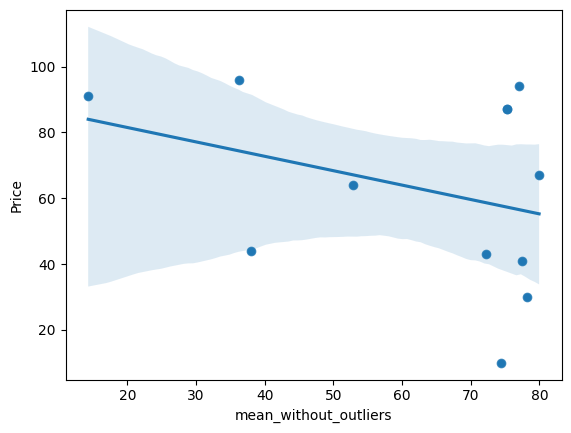

In [ ]:
sns.scatterplot(data=SKU321_adj, x='mean_without_outliers', y='Price')
sns.regplot(data=SKU321_adj, x='mean_without_outliers', y='Price')
plt.show()

In [ ]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(SKU321_adj['mean_without_outliers'], SKU321_adj['Price'])
print(f'Equation: y = {slope:.2f}x + {intercept:.2f}')

Equation: y = -0.44x + 90.21


### La curva de la demanda es la siguiente Q = P/(-0.44) + 205.02

Definimos las siguientes variables: I (Ingreso), P (Precio) & Q (Demanda)

Se busca maximizar los ingresos por lo que tenemos I = P*Q donde P = -0.44Q + 90.21. 
Sustituyendo tenemos I = (-0.44Q + 90.21)Q , la cual se busca encontrar el valor maximo global esto derivando la funcion I(Q) para obtener D(I(Q)) = -0.88Q + 90.21 e igualamos a 0 para obtener Q que maximiza como resultado Q = 102.3 maximiza las ganancias. La cual sustituimos en P(Q) para obtener nuestro precio optimo P = 45.19  

### Pronostico para 3 meses posteriores

El precio optimo es de 45.19 y la cantidad demandada para ese precio es de Q = 102,3 con ventas para los próximos 3 meses de 55,475.244

Si el precio se reduce un 10% a 40.67, la cantidad demandada aumentaria 10% a 112,53 es decir ventas de 4,576.5 semanalmente y para los próximos 3 meses de 54,919.1 (Ya que la elasticidad para estos intervalos es de 1)

Si el precio se incrementa 10% a 49.70, la cantidad demandada disminuye 11% a 92,07 es decir ventas de 4,575.8 semanalmente y para los próximos 3 meses de 54,910.5 (Ya que la elasticidad para estos intervalos es de 1.1)